In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset


#My three observations

#1) Mice gender was even, so the test favored male by only .2%, making gender a non factor for this data analysis
#2) Capomulin tumor size shrinks over timepoints, accoding to this data set, see the line chart for verfication 
#3) Capomulin is the most useful drug regime, it is used the most with 230 users, and has a lot of lower bound outliers,
# making it the most successful drug in the trail. 

In [172]:
merged_inner = pd.merge(left=mouse_metadata, right=study_results, left_on='Mouse ID', right_on='Mouse ID')
merged_inner.shape
merged_inner

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [173]:
merged_inner2 = merged_inner.rename(columns={"Drug Regimen": "Drug_Regimen", "Tumor Volume (mm3)": "Tumor_vol", "Mouse ID": "Mouse_ID", "Weight (g)": "Weight_G"})
merged_inner2


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_G,Timepoint,Tumor_vol,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [174]:

merge_data_sort = merged_inner2.sort_values(["Tumor_vol"], ascending=True)
merge_data_sort


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_G,Timepoint,Tumor_vol,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [175]:
regimen_grouped = merge_data_sort.groupby(["Drug_Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor_vol"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor_vol"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor_vol"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor_vol"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor_vol"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor_vol"].sem()


In [176]:

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [177]:
drug_regimen_data_points = merged_inner2.groupby(["Drug_Regimen"]).count()["Mouse_ID"]
drug_regimen_data_points

Drug_Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse_ID, dtype: int64

In [178]:
drug_df.unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [179]:
drug_df.value_counts()

Naftisol     25
Capomulin    25
Ketapril     25
Ramicane     25
Propriva     25
Infubinol    25
Zoniferol    25
Placebo      25
Ceftamin     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Data Points')

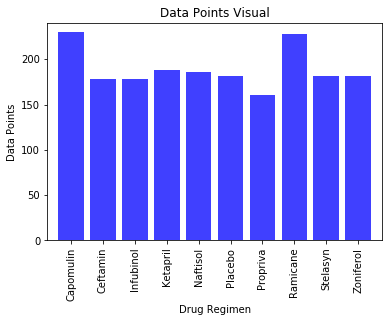

In [180]:
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(drug_regimen_data_points))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

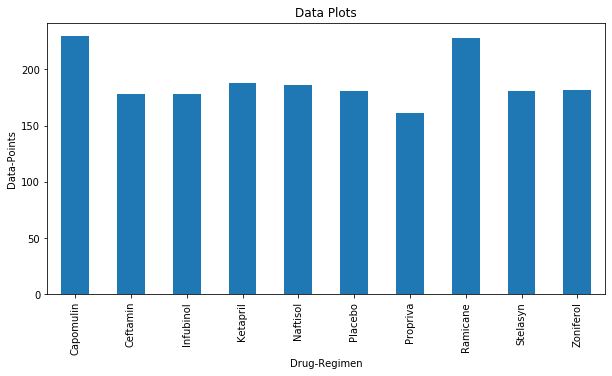

In [181]:
drug_regimen_data_points.plot(kind="bar", figsize=(10,5))
plt.title("Data Plots")
plt.xlabel("Drug-Regimen")
plt.ylabel("Data-Points")

#show chart and set layout
plt.show()

In [182]:
#workcite https://stackoverflow.com/questions/48094854/python-convert-object-to-float
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html
#http://benalexkeen.com/bar-charts-in-matplotlib/
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
    

In [183]:
pie_mice = mouse_metadata['Sex']

In [184]:
pie_mice.count()

249

In [185]:
pie_charting = pie_mice.value_counts()
gender = ["female", "male"]
colors = ["blue", "pink"]
explode = (0.1,0)

(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

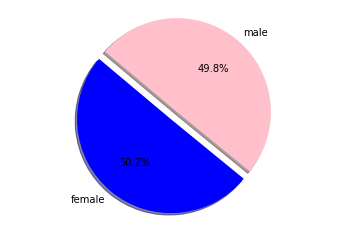

In [186]:
plt.pie(pie_charting, explode=explode, labels=gender, colors=colors, autopct="%1.1f%%",
       shadow=True, startangle=140)
plt.axis("equal")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023166294668>],
      dtype=object)

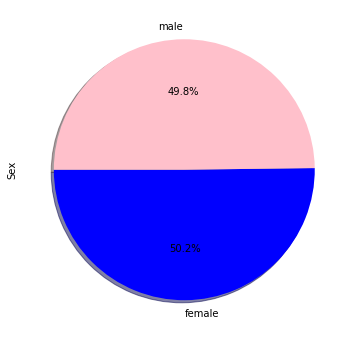

In [187]:
pie_charting.plot.pie(subplots=True, figsize=(6,6), labels=gender, colors=colors,autopct="%1.1f%%",
       shadow=True, startangle=180)


In [188]:
#work cite
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#https://pandas.pydata.org/pandas-docs/version/0.25.3/reference/api/pandas.DataFrame.explode.html
#https://ucsd.bootcampcontent.com/UCSD-Coding-Bootcamp/ucsd-sd-data-pt-01-2020-u-c/blob/master/01-Lesson-Plans/05-Matplotlib/1/Activities/10-Stu_PyPies/Solved/py_pie.ipynb
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html


In [189]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.


#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
#Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

In [190]:
tumor_weight_mouse

0      16
1      17
2      15
3      17
4      16
       ..
244    28
245    26
246    25
247    29
248    30
Name: Weight (g), Length: 249, dtype: int64

In [191]:

tumor_weight_mouse.shape

(249,)

In [192]:
merged_inner = pd.merge(left=mouse_metadata, right=study_results, left_on='Mouse ID', right_on='Mouse ID')
merged_inner.shape
merged_inner

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [193]:
merged_inner2 = merged_inner.rename(columns={"Drug Regimen": "Drug_Regimen", "Tumor Volume (mm3)": "Tumor_vol", "Mouse ID": "Mouse_ID", "Weight (g)": "Weight_G"})

In [194]:
merged_inner2

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_G,Timepoint,Tumor_vol,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [195]:
data_axis1 = merged_inner2[(merged_inner2.Drug_Regimen == 'Capomulin')]
data_axis2 = merged_inner2[(merged_inner2.Drug_Regimen == 'Ramicane')]
data_axis3 = merged_inner2[(merged_inner2.Drug_Regimen == 'Infubinol')]
data_axis4 = merged_inner2[(merged_inner2.Drug_Regimen == 'Ceftamin')]

In [196]:
weight_data1 = data_axis1['Tumor_vol'].astype(float)
weight_data2 = data_axis2['Tumor_vol'].astype(float)
weight_data3 = data_axis3['Tumor_vol'].astype(float)
weight_data4 = data_axis4['Tumor_vol'].astype(float)

In [197]:
weight_data1


10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor_vol, Length: 230, dtype: float64

In [198]:
quartiles = weight_data1.quantile([.25,.5,.75])
lowerq1 = quartiles[0.25]
upperq1 = quartiles[0.75]
iqr1 = upperq1 - lowerq1

print(f"The lower quartile of Capomulin is: {lowerq1}")
print(f"The upper quartile of Capomulin is: {upperq1}")
print(f"The interquartile range of Capomulin is: {iqr1}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq1 - (1.5*iqr1)
upper_bound = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [199]:
quartiles2 = weight_data2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2 - lowerq2

print(f"The lower quartile of Ramicane is: {lowerq2}")
print(f"The upper quartile of Ramicane is: {upperq2}")
print(f"The interquartile range of Ramicane is: {iqr2}")
print(f"The the median of Ramicane is: {quartiles2[0.5]} ")

lower_bound = lowerq2 - (1.5*iqr2)
upper_bound = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [200]:
quartiles3 = weight_data3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3 - lowerq3

print(f"The lower quartile of Infubinol is: {lowerq3}")
print(f"The upper quartile of Infubinol is: {upperq3}")
print(f"The interquartile range of Infubinol is: {iqr3}")
print(f"The the median of Infubinol is: {quartiles3[0.5]} ")

lower_bound = lowerq3 - (1.5*iqr3)
upper_bound = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


In [201]:
quartiles4 = weight_data4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4 - lowerq4

print(f"The lower quartile of Infubinol is: {lowerq4}")
print(f"The upper quartile of Infubinol is: {upperq4}")
print(f"The interquartile range of Infubinol is: {iqr4}")
print(f"The the median of Infubinol is: {quartiles4[0.5]} ")

lower_bound = lowerq4 - (1.5*iqr4)
upper_bound = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 47.208427112500004
The upper quartile of Infubinol is: 56.801437570000004
The interquartile range of Infubinol is: 9.5930104575
The the median of Infubinol is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


In [202]:
#https://ucsd.bootcampcontent.com/UCSD-Coding-Bootcamp/ucsd-sd-data-pt-01-2020-u-c/blob/master/01-Lesson-Plans/05-Matplotlib/3/Activities/02-Ins_Quartiles_and_Outliers/Solved/samples.ipynb
#https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/

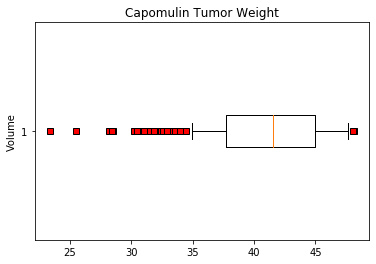

In [203]:
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Weight')
ax1.set_ylabel('Volume')
ax1.boxplot(weight_data1, vert=False, whis=0.4, flierprops=red_square, )
plt.show()

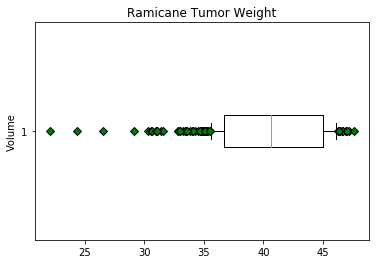

In [204]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Tumor Weight')
ax1.set_ylabel('Volume')
ax1.boxplot(weight_data2, vert=False, whis=0.14, flierprops=green_diamond)
plt.show()

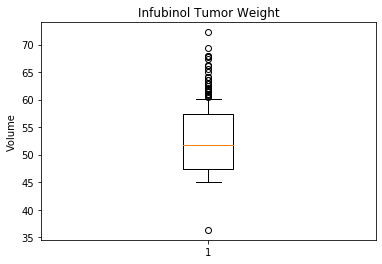

In [205]:
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Tumor Weight')
ax1.set_ylabel('Volume')
ax1.boxplot(weight_data3, whis=.30)
plt.show()

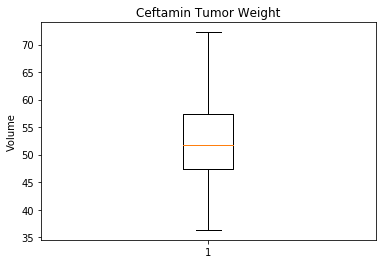

In [206]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor Weight')
ax1.set_ylabel('Volume')
ax1.boxplot(weight_data3)
plt.show()

In [207]:
#https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#https://pandas.pydata.org/pandas-docs/version/0.24.1/reference/api/pandas.DataFrame.boxplot.html


In [208]:
data_axis1

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_G,Timepoint,Tumor_vol,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0, 0.5, 'Volume Size')

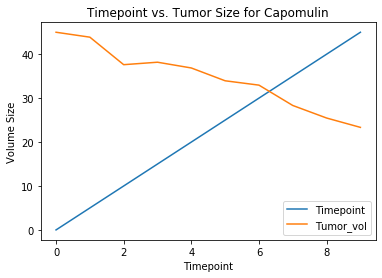

In [213]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = data_axis1[data_axis1["Mouse_ID"].isin(["s185"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse_ID", "Timepoint", "Tumor_vol"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse_ID", "Timepoint", "Tumor_vol"]]
line_plot_final

lines = line_plot_final.plot.line()
plt.title('Timepoint vs. Tumor Size for Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Volume Size')


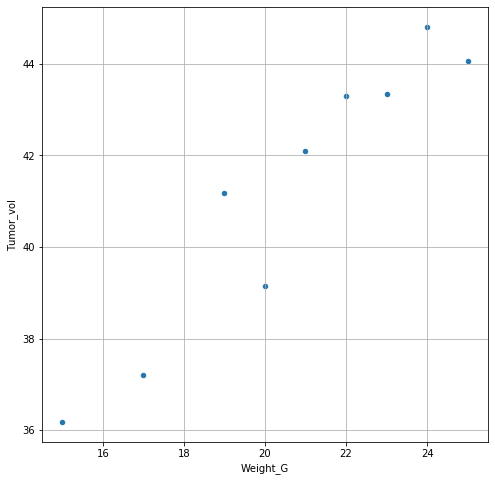

In [210]:
capomulin_scatter = data_axis1[data_axis1["Drug_Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = data_axis1[["Mouse_ID","Weight_G", "Tumor_vol"]]

capomulin_sorted = data_axis1.sort_values(["Weight_G"], ascending=True)


capomulin_grouped_weight = data_axis1.groupby("Weight_G")["Tumor_vol"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight_G', y='Tumor_vol', grid = True, figsize= (8,8))
#capomulin_scatter

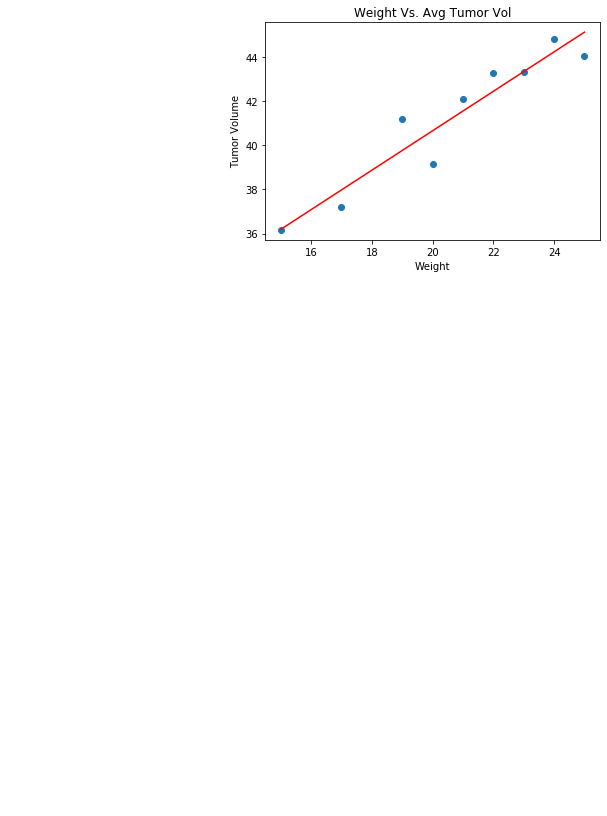

In [212]:
x_values = capo_grouped_plot["Weight_G"]
y_values = capo_grouped_plot["Tumor_vol"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()